# MSE MachLe -- Similarities, k-NN, k-means
**Helmut Grabner, Autum Term, 2020**

### Objectives:
+ calculate different distances in Python
+ perform k-means clustering
+ perform k-NN classification
+ cross-valitation

### Questions:
+ What is meant by "curse of dimensionality"
+ How to set k in k-means?
+ How to set k in k-NN?
+ k-NN: what happens if you set k=1, or k=n?
+ Pros and Cons of the approaches

### Hints:
+ curse of dimensionolity: https://en.wikipedia.org/wiki/Curse_of_dimensionality
+ k-means clustering: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
+ k-NN classifier: https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier
+ Cross Validation: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html#sklearn.model_selection.cross_val_score

# (1) Distances - Curse of dimensionality
Draw two random points in n-dimensions and calulate their distance using Euclidian Norm and repeat 1000 times. Normalize by the maximim possible values. For 2 dimensions the maximum distance ist $\sqrt{2}$, how does it generalize to higher dimensions?

What do you obsereve? Interpret results!

Distance for 2 dimensons : 0.37 , with variance:  0.0317
Distance for 3 dimensons : 0.387 , with variance:  0.0209
Distance for 10 dimensons : 0.402 , with variance:  0.006
Distance for 100 dimensons : 0.408 , with variance:  0.0006
Distance for 1000 dimensons : 0.408 , with variance:  0.0001
Distance for 10000 dimensons : 0.408 , with variance:  0.0


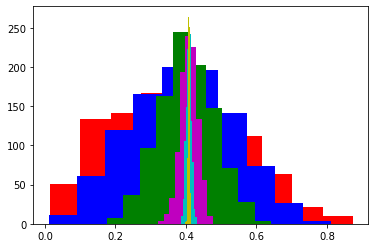

In [1]:
import scipy.spatial.distance as dist
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

c=['r', 'b', 'g', 'm', 'c', 'y']

cnt=-1
for dim in [2, 3, 10, 100, 1000, 10000]:
  cnt = cnt +1
  myDists=[]
  for i in range(1000):
      #draw two random points
      x = np.random.uniform(0, 1, dim)
      y = np.random.uniform(0, 1, dim)

      ### START YOUR CODE HERE ###

      #normalize = ...
      normalize = np.sqrt(dim)
      
      ### END YOUR CODE HERE ###
      
      curDist = dist.euclidean(x, y)/normalize
      myDists.append( curDist )
  print ('Distance for', dim, 'dimensons :' , 
         round(np.mean(myDists),3), ', with variance: ',round(np.var(myDists),4))
  plt.hist(myDists, color=c[cnt])

Same experiment as above, but use a differn distance funtion, e.g., $L_1$ or $L_\infty$. What changes?

Distance for 2 dimensons : 0.335 , with variance:  0.0272
Distance for 3 dimensons : 0.332 , with variance:  0.0186
Distance for 10 dimensons : 0.334 , with variance:  0.0056
Distance for 100 dimensons : 0.333 , with variance:  0.0006
Distance for 1000 dimensons : 0.333 , with variance:  0.0001
Distance for 10000 dimensons : 0.333 , with variance:  0.0


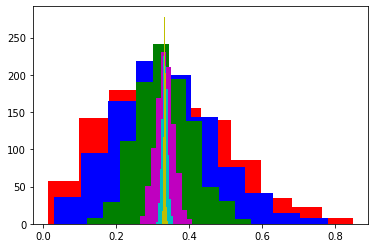

In [ ]:
cnt=-1
for dim in [2, 3, 10, 100, 1000, 10000]:
  cnt = cnt +1
  myDists=[]
  for i in range(1000):
      
      ### START YOUR CODE HERE ###

      x = np.random.uniform(0, 1, dim)
      y = np.random.uniform(0, 1, dim)
      curDist = dist.cityblock(x, y) 
      myDists.append( curDist / (dim) )
      
      ### END YOUR CODE HERE ###

  print ('Distance for', dim, 'dimensons :' , round(np.mean(myDists),3), ', with variance: ',round(np.var(myDists),4))
  plt.hist(myDists, color=c[cnt])

### Add your interpretations & findings here:
...

# (2) k-means clustering: Swiss-Parlament
Based on 921 votes in 2019 in the National Council, a distance matrix was created between all parliamentarians.The elements in the distance matrix show how similar respectively dissimilar (distance) the parliamentarians vote. 


In [5]:
# load librarys
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
from sklearn import (manifold, datasets, decomposition)
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import random
from sklearn.cluster import KMeans
%matplotlib inline
random.seed(0)

# load data
df = pd.read_csv("parlament_dist.txt", encoding="iso-8859-1")
meta = pd.read_csv("meta.txt", encoding="iso-8859-1")
# data preparation
df = df.set_index(df["Name"])
del df["Name"]

# pre-processing of the data
# do a low dimensional embedding -- (forward reference to sub-space methods)
# MDS = MultiDimensional Scaling
mds = manifold.MDS(n_components=2).fit_transform(df)
mds = pd.DataFrame({'V1': mds[:, 0], 'V2': mds[:, 1]})
df_mds = pd.concat([meta, mds], axis=1)

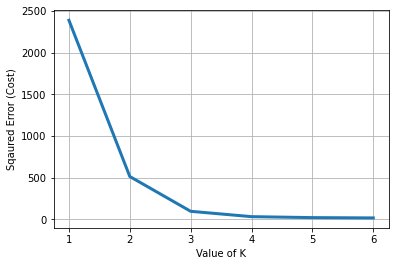

In [6]:
# Run the code below to investigate the number of k, does it match your estimate?

X = mds #...your dataset containing MDS coordinates
cost =[] 
for i in range(1, 7): 
    KM = KMeans(n_clusters = i, max_iter = 500) 
    KM.fit(X)
    cost.append(KM.inertia_)      

plt.plot(range(1, 7), cost, linewidth ='3') 
plt.xlabel("Value of K") 
plt.ylabel("Sqaured Error (Cost)")
plt.grid()

### Add your interpretations & findings here:
...

In [13]:
# Perform k-means clustering with
#   (a) the number of clusters obtained from the task above,
#   (b) the number of parties (prior knowledge)
# and print out the cluster centers.

#### START YOUR CODE HERE ####

#centers = ...

#kmeans = KMeans(n_clusters=3, random_state=0).fit(mds)
#number of parties
kmeans = KMeans(n_clusters=7, random_state=0).fit(mds)
centers = kmeans.cluster_centers_

#### END YOUR CODE HERE ####

print(kmeans)
print(centers.T)


KMeans(n_clusters=7, random_state=0)
[[-0.73191082 -3.05020918  2.81229532 -2.0611153   0.02102885 -0.74664913
   3.2279533 ]
 [ 1.64752591 -3.84714225  1.70016092 -1.03815284  1.66876351  1.01122361
   1.69138594]]


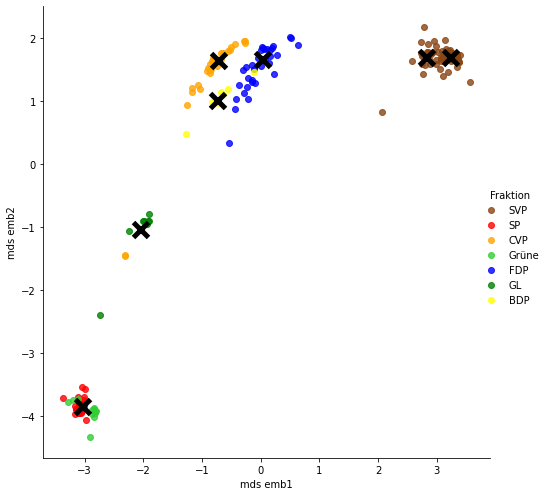

In [14]:
# visualization of MDS and cluster centers
sns.set_palette(["saddlebrown", "red", "orange","limegreen", "blue","green", "yellow"])

# Do the cluster centers make sense to you? Could the data be better explained by more or less clusters?

# Plot mds embedding
ax = sns.lmplot('V1', 'V2', data = df_mds, fit_reg = False, size = 7, hue='Fraktion')
plt.plot(centers.T[0],centers.T[1],"x", color ="black" ,markersize=15, markeredgewidth=5)
plt.xlabel('mds emb1')
plt.ylabel('mds emb2')

# replace Fraction labels with party labels (optional)
new_labels = ["SVP","SP","CVP","Grüne","FDP","GL","BDP"]
for t, l in zip(ax._legend.texts, new_labels): t.set_text(l)

### Add your interpretations & findings here:
...

# (3) k-NN, Diabetes data

Fit a k-NN classifier to the given dataset containing data from diabetes patients.
Choose as k, the values 1,5 and n (number of train samples) and plot the corresponding confusion matrix. What do you observe in the extreme cases for k.



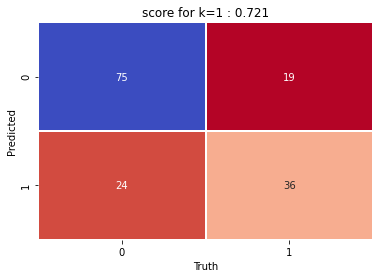

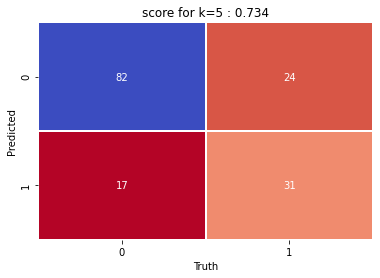

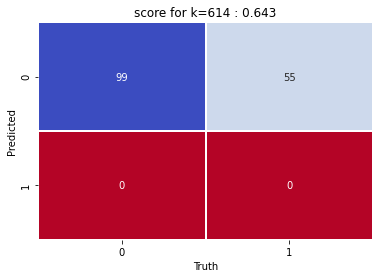

In [20]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, f1_score
import numpy as np
np.random.seed(1)
%matplotlib inline

# get data
df = pd.read_csv('diabetes.csv')
X = df.drop(columns=['Diabetes'])
y = df['Diabetes'].values

#split dataset into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Perform a k-NN on the given dataset and plot the confusion matrix

n = X_train.shape[0]
for i in [1,5,n]:
    
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train,y_train)
    
    # predict test data
    pred = knn.predict(X_test)
    # Returns the mean accuracy on the given test data and labels
    score = knn.score(X_test, y_test)
    # get the confusion matrix
    conf = confusion_matrix(pred, y_test)
    # plot
    sns.heatmap(conf, annot=True, fmt='d', cbar=False, cmap="coolwarm_r",  linewidth = 1)
    plt.title('score for k={} : {}'.format(i,round(score,3)))
    plt.xlabel('Truth')
    plt.ylabel('Predicted')
    plt.show()
    
    



### Add your interpretations & findings here:
...

## Whats the optmal k?

Loop from 1 to 100 to find the best k for k-NN. Use the mean cross validation score to estimate the best k.

Apply a k-NN with your estimated best k and plot the confusion matrix.

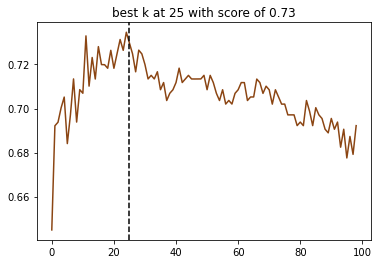

In [22]:
# single crossvalidation for given K
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, f1_score
import numpy as np
np.random.seed(1)
%matplotlib inline
from sklearn.model_selection import cross_val_score

# get data
df = pd.read_csv('diabetes.csv')
X = df.drop(columns=['Diabetes'])
y = df['Diabetes'].values

#split dataset into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Loop from 1 to 100 to find the best k for k-NN. 
# Use the mean of the cross validation scores to estimate the best k

#### START YOUR CODE HERE ####

#create a new KNN model
scores = []
for k in range(1,100):

  knn_cv = KNeighborsClassifier(n_neighbors=k)

  #train model with cv of 5 
  cv_scores = cross_val_score(knn_cv, X_train, y_train, cv=5)
  
  #print each cv score (accuracy) and average them
  scores.append(np.mean(cv_scores))

best_k = np.argmax(scores)+1
best_score = scores[best_k]

plt.plot(scores)
plt.title("best k at {} with score of {}".format(best_k, round(best_score,3)))
plt.axvline(x=best_k, c="k",  ls="--")
plt.show()

#### END YOUR CODE HERE ####


### Add your interpretations and findings here:
...

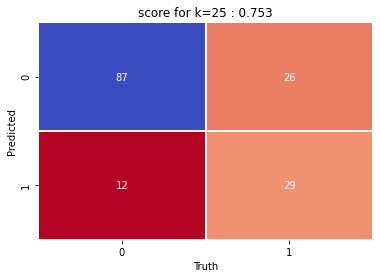

In [24]:
# Create KNN classifier for estimated best k

#### START YOUR CODE HERE ####

knn = KNeighborsClassifier(n_neighbors = best_k)
# Fit the classifier to the data
knn.fit(X_train,y_train)
# predict test data
pred = knn.predict(X_test)
# Returns the mean accuracy on the given test data and labels
score = knn.score(X_test, y_test)
# get the confusion matrix
conf = confusion_matrix(pred, y_test)
# plot
sns.heatmap(conf, annot=True, fmt='d', cbar=False, cmap="coolwarm_r",  linewidth = 1)
plt.title('score for k={} : {}'.format(best_k, round(score,3)))
plt.xlabel('Truth')
plt.ylabel('Predicted')
plt.show()

#### END YOUR CODE HERE ####

